In [2]:
import h2o
import numpy as np
import matplotlib.pyplot as plt
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,10 mins 02 secs
H2O cluster timezone:,Europe/Paris
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,1 month and 6 days
H2O cluster name:,wanqi
H2O cluster total nodes:,1
H2O cluster free memory:,870 Mb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


# Model Construction

In [74]:
# Train Deep Learning model and validate on test set
def model_construction():
    #import data
    train = h2o.import_file("C:/Users/wanqi/Documents/study/arcade-machinelearning/train.csv")
    test = h2o.import_file("C:/Users/wanqi/Documents/study/arcade-machinelearning/test.csv")
    # Specify the response and predictor columns
    y = "game"
    x = train.names[0:58]
    # Encode the response column as categorical for multinomial classification
    train[y] = train[y].asfactor()
    test[y] = test[y].asfactor()
    #construct neural networks
    model = H2ODeepLearningEstimator(distribution="multinomial",activation="MaxoutWithDropout",hidden=[20],
                                     sparse=True,l2=1e-4,epochs=15,score_each_iteration=True,balance_classes=True,
                                     max_after_balance_size=2.0,loss="CrossEntropy",stopping_metric="mean_per_class_error",
                                     shuffle_training_data=True)
    #train the neural networks
    model.train(x=x,y=y,training_frame=train,validation_frame=test)
    #extract the results
    test_results = model.model_performance(valid=True) # validation metrics
    df = test_results.confusion_matrix().as_data_frame() # extract confusion_matrix and transfer to dataframe
    error_array = df.as_matrix(columns=df.columns[7:8]) # extract error column and transfer to array
    error = error_array.transpose()  #transpose array to shape(1,8)
    return error

# Results

In [75]:
error_BOMBER_MANs = []
error_DDRAGONs = []
error_GALAXIANs = []
error_GYRUSSs = []
error_MORTAL_COMBATs = []
error_PUCKMANs = []
error_STREETFIGHTERs = []
error_Totals = []
all_error = []

#Iteration
num = 10
xs = [x for x in range(1,num+1)]
for x in range(0, num):
    error = model_construction()
    
    error_BOMBER_MANs.append(error[0,0])
    error_DDRAGONs.append(error[0,1])
    error_GALAXIANs.append(error[0,2])
    error_GYRUSSs.append(error[0,3])
    error_MORTAL_COMBATs.append(error[0,4])
    error_PUCKMANs.append(error[0,5])
    error_STREETFIGHTERs.append(error[0,6])
    error_Totals.append(error[0,7])
    
all_error = [error_BOMBER_MANs, error_DDRAGONs,error_GALAXIANs, error_GYRUSSs, error_MORTAL_COMBATs, error_PUCKMANs,
             error_STREETFIGHTERs, error_Totals]  

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
Parse progress: |███████████

# Boxplot

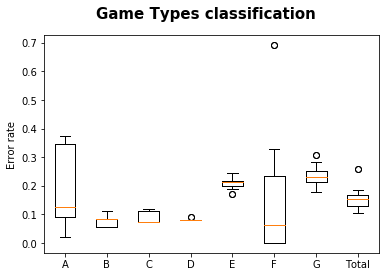

In [76]:
fig = plt.figure()
fig.suptitle('Game Types classification', fontsize=15, fontweight='bold')
ax = fig.add_subplot(111)
#ax.set_xticklabels(['A', 'Transfer_SGD', 'Transfer_SVM'])
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.boxplot(all_error)
plt.boxplot(all_error)
#ax.set_title('axes title')
plt.xticks([1,2,3,4,5,6,7,8],['A','B', 'C', 'D','E','F','G','Total'])
ax.set_ylabel('Error rate')
plt.show()

In [77]:
all_error

[[0.0364963503649635,
  0.3722627737226277,
  0.021897810218978103,
  0.3722627737226277,
  0.1386861313868613,
  0.35036496350364965,
  0.10948905109489052,
  0.08759124087591241,
  0.10218978102189781,
  0.3357664233576642],
 [0.08333333333333333,
  0.1111111111111111,
  0.08333333333333333,
  0.05555555555555555,
  0.05555555555555555,
  0.1111111111111111,
  0.05555555555555555,
  0.08333333333333333,
  0.08333333333333333,
  0.05555555555555555],
 [0.07142857142857142,
  0.07142857142857142,
  0.09523809523809523,
  0.07142857142857142,
  0.07142857142857142,
  0.11904761904761904,
  0.11904761904761904,
  0.07142857142857142,
  0.11904761904761904,
  0.07142857142857142],
 [0.08163265306122448,
  0.08163265306122448,
  0.08163265306122448,
  0.08163265306122448,
  0.09183673469387756,
  0.08163265306122448,
  0.08163265306122448,
  0.08163265306122448,
  0.08163265306122448,
  0.08163265306122448],
 [0.24528301886792453,
  0.22641509433962265,
  0.2169811320754717,
  0.1886792452